#import library

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## load & show image

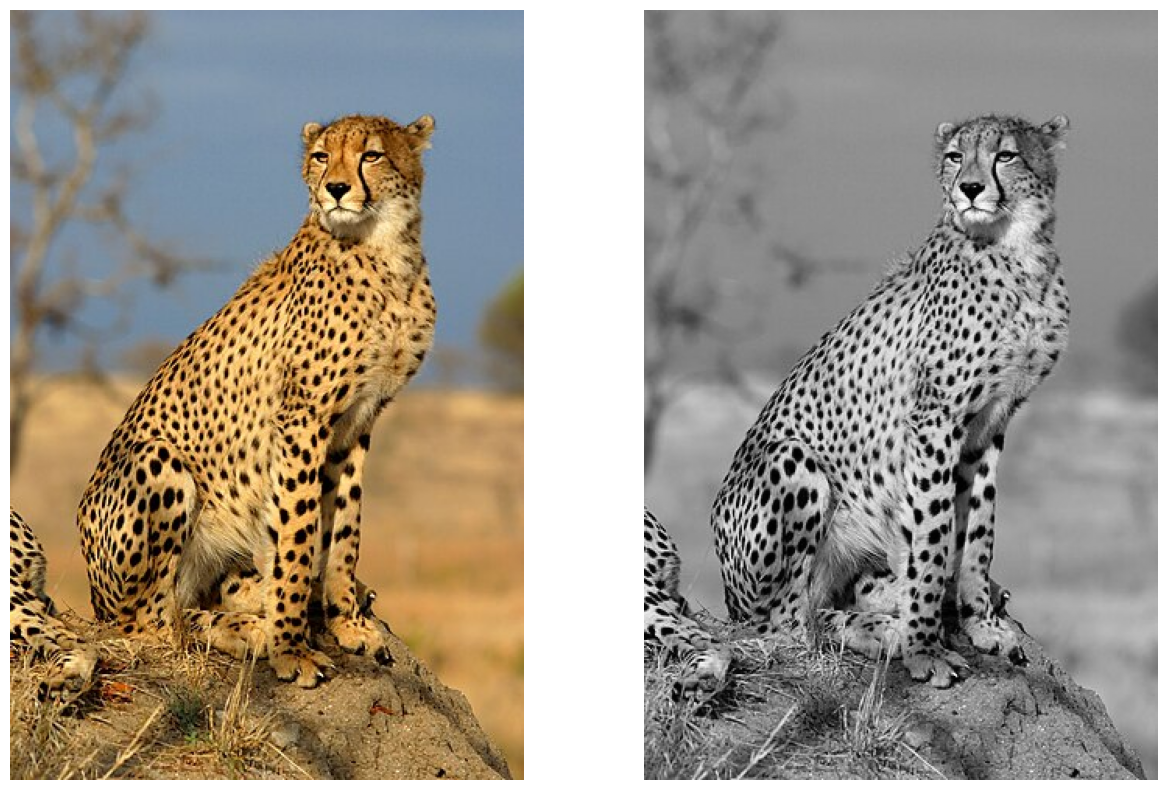

(495, 330)


In [4]:
img = np.array(Image.open('TheCheethcat.jpg')).astype(np.uint8)

gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

plt.show()
print(gray_img.shape)

# Sobel Operator


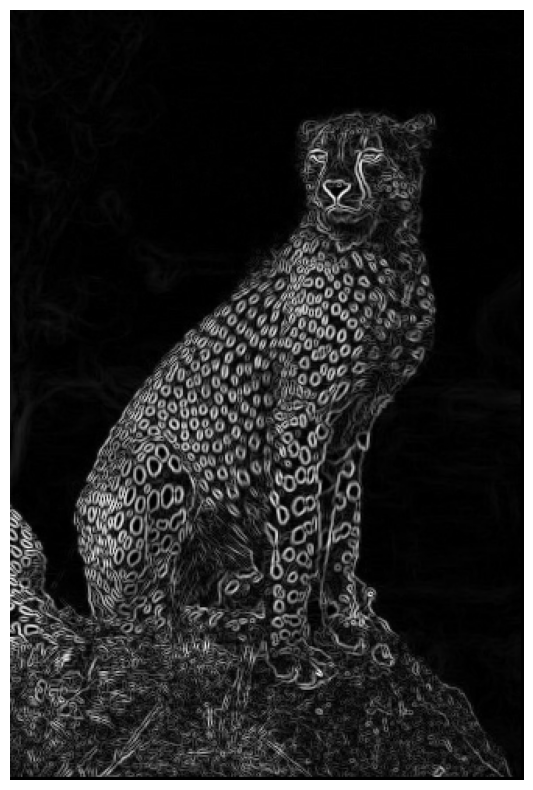

In [42]:
# Sobel Operator
h, w = gray_img.shape

# Define Sobel filters

horizontal = np.array([[-1, 0, +1], [-2, 0, +2], [-1, 0, +1]])
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))
for i in range(1, h - 1):
    for j in range(1, w - 1):
        #Apply horizontal Sobel filters using convolution over 3x3 neighborhoods
        horizontalGrad = np.sum(gray_img[i - 1:i + 2, j - 1:j + 2] * horizontal)
        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        #Apply vertical Sobel filters using convolution over 3x3 neighborhoods
        verticalGrad = np.sum(gray_img[i - 1:i + 2, j - 1:j + 2] * vertical)

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(horizontalGrad ** 2 + verticalGrad ** 2)
        newgradientImage[i - 1, j - 1] = mag

plt.figure(figsize=(15, 10))
plt.imshow(newgradientImage, cmap='gray')
plt.axis('off')
plt.show()

# Prewitt Operator


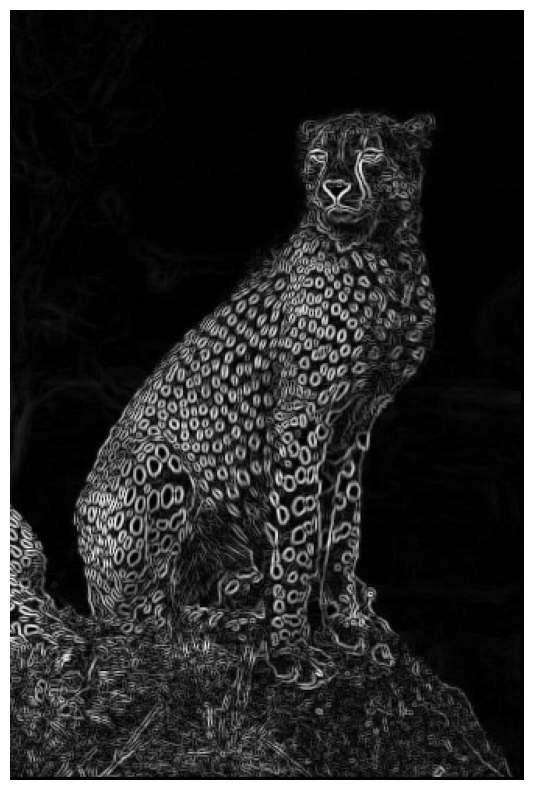

In [43]:
# Prewitt Operator
h, w = gray_img.shape

# Define Prewitt filters
horizontal = np.array([[-1, 0, +1], [-1, 0, +1], [-1, 0, +1]])
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

newgradientImage = np.zeros((h, w))

for i in range(1, h - 1):
    for j in range(1, w - 1):
        # Similar to Sobel, apply horizontal and vertical Prewitt filters and compute gradient magnitude
        horizontalGrad = np.sum(gray_img[i - 1:i + 2, j - 1:j + 2] * horizontal)
        verticalGrad = np.sum(gray_img[i - 1:i + 2, j - 1:j + 2] * vertical)

        # Edge Magnitude
        mag = np.sqrt(horizontalGrad ** 2 + verticalGrad ** 2)
        newgradientImage[i - 1, j - 1] = mag

plt.figure(figsize=(15, 10))
plt.imshow(newgradientImage, cmap='gray')
plt.axis('off')
plt.show()

# Canny Operator


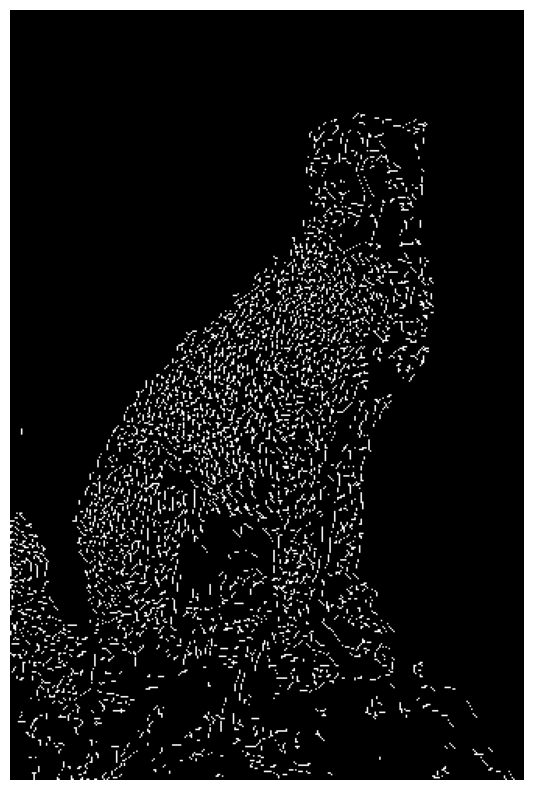

In [46]:
from scipy.ndimage import gaussian_filter, sobel

gray_img = Image.open('TheCheethcat.jpg').convert('L')
gray_img = np.array(gray_img, dtype=np.float32)

blurred = gaussian_filter(gray_img, sigma=1.4)

dx = sobel(blurred, axis=0)
dy = sobel(blurred, axis=1)
gradient_magnitude = np.hypot(dx, dy)
gradient_direction = np.arctan2(dy, dx)


def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.float32)
    # 1. Convert direction to degrees (0-180 range)
    # 2. For each pixel, compare magnitude with neighbors along gradient direction
    # 3. Suppress non-maximum values (set to 0)
    # Hint: Check 4 direction bins (0°, 45°, 90°, 135°) and compare with appropriate neighbors

    direction = np.degrees(direction) % 180
    for i in range(rows):
        for j in range(cols):
            dir_p = direction[i, j]
            grad_p = magnitude[i, j]
            n1 = 0
            n2 = 0
            if 0 <= dir_p < 45:
                n1 = magnitude[i, j-1] if j>0 else 0
                n2 = magnitude[i, j+1] if j+1<cols else 0
                
            elif 45 <= dir_p < 90:
                n1 = magnitude[i-1, j+1] if  i>0 and j+1<cols  else 0
                n2 = magnitude[i+1, j-1] if i+1<rows and j>0 else 0
            
            elif 90 <= dir_p < 135:
                n1 = magnitude[i-1, j] if i>0  else 0
                n2 = magnitude[i+1, j] if i+1<rows  else 0
            elif 135 <= dir_p < 180:
                n1 = magnitude[i-1, j-1] if i>0 and j>0 else 0
                n2 = magnitude[i+1, j+1] if i+1<rows and j+1<cols else 0
            
            if grad_p < max(n1,n2):
                suppressed[i,j] = 0
            else :
                suppressed[i,j] = grad_p
    return suppressed


nms_img = non_maximum_suppression(gradient_magnitude, gradient_direction)

low_threshold = 50
high_threshold = 100

# Apply double thresholding
# Steps:
# 1. Mark strong edges as 255
# 2. Mark weak edges as 75
strong_edges =  np.where(nms_img >= high_threshold, 255, 0)
weak_edges = np.where( (nms_img >= low_threshold) & (nms_img < high_threshold) , 75, 0)


def hysteresis(strong, weak):
    rows, cols = strong.shape

    for i in range(rows):
        for j in range(cols):
            s = strong[i, j]
            directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
            if s == 255:
                for s in directions:
                    if 0<=i+s[0] <rows and 0<=j+s[1] <cols:
                        if weak[i+s[0],j+s[1]] ==75 :
                            strong[i+s[0],j+s[1]] = 255
    return strong


edges = hysteresis(strong_edges, weak_edges)

plt.figure(figsize=(15, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


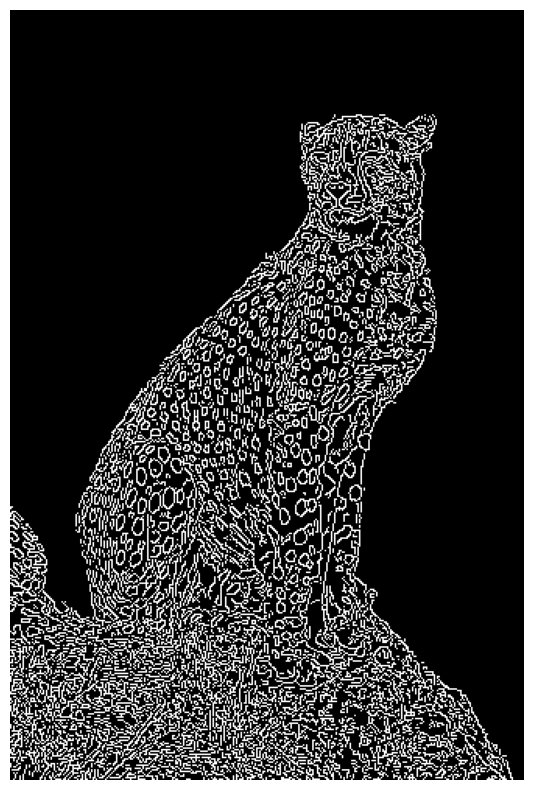

In [3]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('TheCheethcat.jpg')

# Apply Canny
# Use cv2.Canny with the following parameters:
# - Low threshold (e.g., 100)
# - High threshold (e.g., 200)
# - Aperture size for Sobel operator (e.g., 3)
edges =  cv2.Canny(img, 100, 200, apertureSize=3)

plt.figure(figsize=(15, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()